In [6]:
import os
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set() # sns.set() ==> グラフの見た目をseabornに合わせる

import matplotlib.pyplot as plt
%matplotlib inline

import mysql.connector
from tqdm.notebook import tqdm

In [8]:
cur.execute("SELECT * FROM horse_seiseki WHERE (year >= 15 and year <= 21) ORDER BY race_id ASC")
rows = cur.fetchall()
cols =  ['id', '年', '月', '日', '日付S', '回次', '場所', '日次', '発走時刻', 'レース番号', 'レースID',
       '略レース名', 'クラスコード', '芝・ダ', 'トラックコード', 'コーナー回数', '距離', 'コース区分', '馬場状態',
       '天候', '馬名', '性別', '年齢', '騎手', '斤量', 'ブリンカー', '頭数', '枠番', '馬番', '入先着順',
       '異常コード', '確定着順', '着差タイム', '人気', '走破タイム秒', 'タイムS', '補正タイム', '補9',
       '通過順1角', '通過順2角', '通過順3角', '通過順4角', '脚質', '上がり3F', '馬体重', '増減', '調教師',
       '所属', '賞金', '血統登録番号', '騎手コード', '調教師コード', '馬主名', '生産者名', '父馬名', '母馬名',
       '母の父名', '毛色', '生年月日', '単勝オッズ', 'PCI', 'RPCI', 'PCI3', 'Ave-3F', 'レース名',
       '年齢限定競走種別コード', '競走記号コード', '重量コード', '1着本賞金', 'race_id', 'ZI',
       'レース間隔_週', 'jocky_weight_diff', 'created_at', 'updated_at']
upper_rank = pd.DataFrame(rows, columns=cols)
upper_rank

,id,年,月,日,日付S,回次,場所,日次,発走時刻,レース番号,...,年齢限定競走種別コード,競走記号コード,重量コード,1着本賞金,race_id,ZI,レース間隔_週,jocky_weight_diff,created_at,updated_at
0,199438,15,1,4,2015.1.4,1,中山,1,09:50,1,...,12,003,3,500,2015010406010101,89,5,0.0,2022-04-04 16:14:17,2022-04-04 16:14:17
1,199439,15,1,4,2015.1.4,1,中山,1,09:50,1,...,12,003,3,500,2015010406010101,105,19,0.0,2022-04-04 16:14:18,2022-04-04 16:14:18
2,199440,15,1,4,2015.1.4,1,中山,1,09:50,1,...,12,003,3,500,2015010406010101,102,5,1.0,2022-04-04 16:14:07,2022-04-04 16:14:07
3,199441,15,1,4,2015.1.4,1,中山,1,09:50,1,...,12,003,3,500,2015010406010101,111,4,1.0,2022-04-04 16:14:31,2022-04-04 16:14:31
4,199442,15,1,4,2015.1.4,1,中山,1,09:50,1,...,12,003,3,500,2015010406010101,113,3,1.0,2022-04-04 16:14:11,2022-04-04 16:14:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341656,583956,21,12,28,2021.12.28,6,阪神,9,16:25,12,...,13,A00,1,1820,2021122809060912,106,2,-1.0,2022-04-04 16:16:25,2022-04-04 16:16:25
341657,583957,21,12,28,2021.12.28,6,阪神,9,16:25,12,...,13,A00,1,1820,2021122809060912,103,6,0.0,2022-04-04 16:17:03,2022-04-04 16:17:03
341658,583958,21,12,28,2021.12.28,6,阪神,9,16:25,12,...,13,A00,1,1820,2021122809060912,102,13,-2.0,2022-04-04 16:16:28,2022-04-04 16:16:28
341659,583959,21,12,28,2021.12.28,6,阪神,9,16:25,12,...,13,A00,1,1820,2021122809060912,103,11,-1.0,2022-04-04 16:17:02,2022-04-04 16:17:02


牡    189752
牝    136607
セ     15302
Name: 性別, dtype: int64


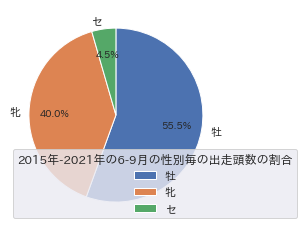

In [9]:
label = ['牡', '牝', 'セ']
print(ddd['性別'].value_counts())

plt.pie(ddd['性別'].value_counts().sort_index(ascending=False),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
title = '2015年-2021年の{}-{}月の性別毎の出走頭数の割合'.format(6, 9)
plt.legend(title=title)
plt.show()

In [10]:
# 夏は牝馬が強いのか？
# 次期よりも実際は気温から暑さに強いか調べるべきかも・・・
upper_rank = upper_rank[upper_rank['確定着順'] >= 1]
upper_rank = upper_rank[upper_rank['確定着順'] <= 3]
upper_rank = upper_rank[['race_id', '年', '月', '日', '血統登録番号', '性別', '確定着順']]
upper_rank = upper_rank.reset_index()


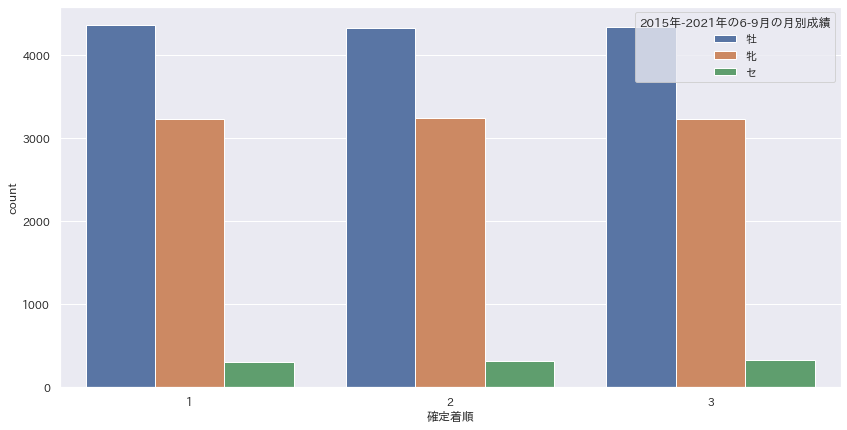

In [14]:
summer_rank = upper_rank.query('6 <= 月 <= 9')

sns.set(rc = {'figure.figsize':(14,7)})
ax = sns.countplot(x='確定着順', data=summer_rank, hue='性別', hue_order=['牡', '牝', 'セ'])

title = '2015年-2021年の{}-{}月の着順別成績'.format(6, 9)
plt.legend(title=title)
plt.show()

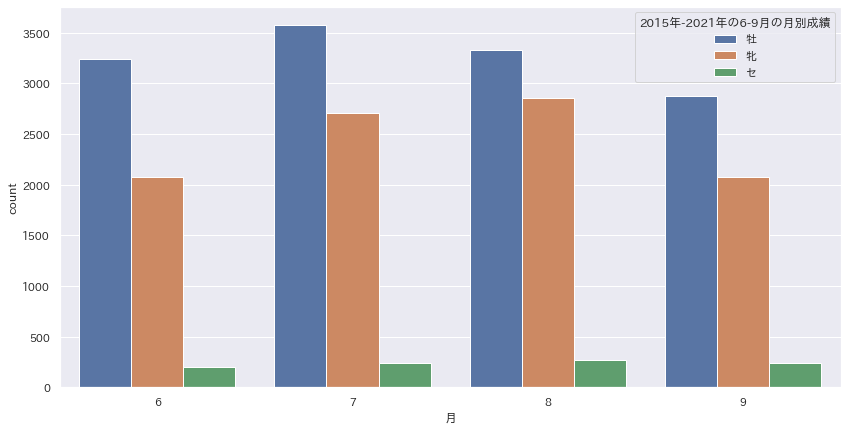

In [11]:
summer_rank = upper_rank.query('6 <= 月 <= 9')

sns.set(rc = {'figure.figsize':(14,7)})
ax = sns.countplot(x='月', data=summer_rank, hue='性別', hue_order=['牡', '牝', 'セ'])

title = '2015年-2021年の{}-{}月の月別成績'.format(6, 9)
plt.legend(title=title)
plt.show()

In [12]:
summer_rank.query('確定着順==3')[summer_rank['性別']=='牝']

/home/toshiya/.local/share/virtualenvs/keiba-fIgOWeR2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,index,race_id,年,月,日,血統登録番号,性別,確定着順
4400,21621,2015060605030101,15,6,6,2012103399,牝,3
4414,21697,2015060605030106,15,6,6,2012101315,牝,3
4433,21788,2015060605030112,15,6,6,2012104757,牝,3
4434,21789,2015060609030101,15,6,6,2012104550,牝,3
4442,21831,2015060609030103,15,6,6,2012102743,牝,3
...,...,...,...,...,...,...,...,...
69897,329199,2021092606040710,21,9,26,2015101447,牝,3
69901,329228,2021092606040712,21,9,26,2018101966,牝,3
69910,329260,2021092607050703,21,9,26,2019104976,牝,3
69920,329302,2021092607050706,21,9,26,2018104348,牝,3
